<p>
<h1><b><center></center></b></h1>
<center><img src="https://drive.google.com/uc?id=1UJc1ci41G6ahJ7ProKvunUOIBcTXZ6ZG" align="center" width="550"></center>
</p>
<h1><b><center>Mecánica Celeste</center></b></h1>
<h2><b><center>Prof. Jorge I. Zuluaga</center></b></h1>
<h2><b><center>Tarea 3</center></b><h2>
<h3><b><center>Tensor de esfuerzos y deformación</center></b><h3>
<h5><center><b>Asignada</b>: 2 de Abril de 2024</center><h5>
<h5><center><b>Entrega</b>: 16 de Abril de 2024</center><h5>
</p>

<hr/>
<b>Nombre</b>: Bryan Camilo Restrepo Arcila
<br/>
<b>Cédula</b>: 1000567825
<br/>
<b>Última actualización</b>:
<hr/>

## Enunciado

**Objetivo**: El objetivo de esta tarea es poner en práctica con un problema práctico algunos de los temas vistos sobre el tensor de esfuerzos y el tensor de deformación.

**Procedimiento**:

Un bloque metálico de 2 metros por 1 metro, con 0.2 metros de espesor, esta sometido a un campo de desplazamientos dado por la siguiente expresión:

  $$
  \begin{array}{ll}
x & =X+0.001 Y+0.0002 X^2 - 0.002 Z \\
y & =1.001 Y-0.0002 Y^2 + 0.004 Z \\
z& = 0.0003 X^2 + 0.0004 Y + 0.998 Z
\end{array}
  $$

1. Hacer un mapa de campo vectorial mostrando los vectores de desplazamiento $\vec u$ en la lamina. Es decir, sobre una malla de valores de las coordenadas eulerianas $X, Y$ dibujar el valor del vector de desplazamiento proyectado sobre ese plano $(u_x, u_y)$ para un valor de z específico. Crear un código interactivo que permita, variando el valor de $z$, ver el campo de desplazamientos en la lámina. Hacer lo mismo para cortes en el plano $X-Z$ y $Y-Z$.

2. Calcular el campo tensorial de deformaciones (pequeñas) dentro de la lámina, $u_{ij}$ como función de $\vec X$. Si se diagonaliza el tensor de deformaciones, es posible encontrar en cada punto las denominadas deformaciones principales (autovalores del tensor), $\epsilon_1, \epsilon_2, \epsilon_3$ (de menor a mayor de acuerdo con su valor absoluto) y las direcciones principales de deformación (autovectores normalizados), $\hat e_{u1}, \hat e_{u2}, \hat e_{u3}$. Escriba un código interactivo que permita variar el valor de $X, Y, Z$ y que muestre, en un gráfico en 3-D, las direcciones principales de deformación (son 3 vectores ortogonales) en ese punto de la lámina, de modo que el tamaño de cada vector sea proporcional al valor absoluto de la deformación principal correspondiente. Juegue con el código y comente lo que observa.

3. Consulte el módulo de Young $E$ y el coeficiente de Poisson del Aluminio $\nu$ y, usando la ley de Hooke (relación constitutiva), calcule el tensor de esfuerzos en cada punto del bloque (campo tensorial de esfuerzos) y la presión (campo escalar de presión). Ambos campos deben escribirse como función de $X, Y, Z$. Haga un interactivo en el que muestre, variando el valor de z, un gráfico de contornos (o mapa de calor) de la presión experimentada a cada profundidad dentro del bloque. ¿En que punto del bloque se experimenta la máxima presión y cuánto vale?.

4. Calcule el tensor de esfuerzos en el centro del bloque. Diagonalizando el tensor, determine los esfuerzos principales (autovalores del tensor), $\sigma_1, \sigma_2, \sigma_3$ y las direcciones de los esfuerzos principales (autovectores del tensor normalizados) $\hat e_{\sigma1}, \hat e_{\sigma2}, \hat e_{\sigma3}$. Ahora aplique una rotación del tensor de esfuerzos en ese punto y demuestre que el tensor rotado tiene forma diagonal. Repita el procedimiento de rotación a todos los puntos del bloque y usando esos tensores de esfuerzos rotados, repita 3 (mapas de calor de la presión en el bloque y lugar donde la presión es más grande).

5. Determine el valor del vector de esfuerzo normal (tracción sobre la cara, $\vec t_n = \mathbf{\sigma}\cdot\hat n$) que experimenta el bloque en cada una de sus 6 caras y el esfuerzo normal correspondiente ($\sigma_n = \vec t_n\cdot\hat n$). Haga gráficos de contorno (mapas de calor) para el valor del esfuerzo normal en cada uno de los puntos de esas caras. Comente su resultado.  Calcule también el valor del vector de esfuerzo de cizalladura en cada una de las 3 caras ($\vec\tau_n = \vec t_n - \sigma_n\hat n$) y haga mapas de campo vectorial de esos vectores en cada una de ellas.


**Resultados esperados**:

- Este notebook con el procedimiento debidamente comentado.

- Gráficos mínimos:
  - Gráficos de cada punto.

- Datos mínimos:
  - Los números solicitados en cada punto.

- En caso de utilizar ayudas como `ChatGPT` o códigos de `Stack Over Flow` debe citar debidamente la fuente, pero también entender a cabalidad el código, el profesor puede pedir justificación.

## Solución

Instalación de Librerías 

In [66]:
!pip install -q ipywidgets

Importanción de librerías

In [67]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import ipywidgets as widgets
from IPython.display import display
import ipywidgets as widgets
from ipywidgets import interact, interact_manual
import sympy as sp
from scipy.optimize import minimize


**Procedimiento**:

Un bloque metálico de 2 metros por 1 metro, con 0.2 metros de espesor, esta sometido a un campo de desplazamientos dado por la siguiente expresión:

  $$
  \begin{array}{ll}
x & =X+0.001 Y+0.0002 X^2 - 0.002 Z \\
y & =1.001 Y-0.0002 Y^2 + 0.004 Z \\
z& = 0.0003 X^2 + 0.0004 Y + 0.998 Z
\end{array}
  $$
  
1. Hacer un mapa de campo vectorial mostrando los vectores de desplazamiento $\vec u$ en la lamina. Es decir, sobre una malla de valores de las coordenadas eulerianas $X, Y$ dibujar el valor del vector de desplazamiento proyectado sobre ese plano $(u_x, u_y)$ para un valor de z específico. Crear un código interactivo que permita, variando el valor de $z$, ver el campo de desplazamientos en la lámina. Hacer lo mismo para cortes en el plano $X-Z$ y $Y-Z$.

Definamos las funciones de desplazamiento de nuestro problema a partir de las posiciones iniciales X, Y, Z

In [68]:
def displacement_x(X, Y, Z):
    """
    Calcula la componente final en x del desplazamiento dado las coordenadas X, Y, Z.
    
    Parámetros:
    X (float): Coordenada en el eje X.
    Y (float): Coordenada en el eje Y.
    Z (float): Coordenada en el eje Z.
    
    Retorna:
    float: La componente final en x del desplazamiento.
    """
    return X + 0.001 * Y + 0.0002 * X**2 - 0.002 * Z

def displacement_y(_, Y, Z):
    """
    Calcula la componente final en y del desplazamiento dado las coordenadas X, Y, Z.
    
    Parámetros:
    X (float): Coordenada en el eje X.
    Y (float): Coordenada en el eje Y.
    Z (float): Coordenada en el eje Z.
    
    Retorna:
    float: La componente final en y del desplazamiento.
    """
    return 1.001 * Y - 0.0002 * Y**2 + 0.004 * Z

def displacement_z(X, Y, Z):
    """
    Calcula la componente final en z del desplazamiento dado las coordenadas X, Y, Z.
    
    Parámetros:
    X (float): Coordenada en el eje X.
    Y (float): Coordenada en el eje Y.
    Z (float): Coordenada en el eje Z.
    
    Retorna:
    float: La componente final en z del desplazamiento.
    """
    return 0.0003 * X**2 + 0.0004 * Y + 0.998 * Z

Hagamos el gráfico interactivo para perfiles x, y en relación a la variación de z

In [69]:
@interact
def constante_jacobi_grafico(Z_value = (0,0.2,0.01)):
  X_range = np.linspace(0, 2, 7)  # Range for X
  Y_range = np.linspace(0, 1, 7)  # Range for Y
  X, Y = np.meshgrid(X_range, Y_range)  # Create meshgrid

  # Calculate initial vectors
  
  x = displacement_x(X, Y, Z_value) 
  y = displacement_y(X, Y, Z_value) 
  # print(X, Y, Z_value, x, y)
  # Plot vector field for the XY plane
  plt.figure(figsize=(10, 5))
  # plt.plot(X, Y, 'o', color='black')
  plt.quiver(X, Y, x - X, y - Y, angles='xy', scale_units='xy', scale=1, color='purple')
  plt.title(f'Vector de desplazamiento para Z={Z_value}[m] en el plano XY')
  plt.xlabel(r'$\hat{U}_x$ [m]')
  plt.ylabel(r'$\hat{U}_y$ [m]')
  plt.grid()
  plt.show()

interactive(children=(FloatSlider(value=0.1, description='Z_value', max=0.2, step=0.01), Output()), _dom_class…

Hagamos lo mismo para para cortes en el plano X, Z

In [70]:
@interact
def constante_jacobi_grafico(Y = (0,1,0.01)):
  X_range = np.linspace(0, 2, 7)  # Range for X
  Z_range = np.linspace(0, 0.2, 7)  # Range for Z
  X, Z = np.meshgrid(X_range, Z_range)  # Create meshgrid

  # Calculate initial vectors
  x = displacement_x(X, Y, Z) 
  z = displacement_z(X, Y, Z) 

  # Plot vector field for the XY plane
  plt.figure(figsize=(10, 5))
  plt.quiver(X, Z, x - X, z - Z, angles='xy', scale_units='xy', scale=1, color='red')
  plt.title(f'Vector de desplazamiento para Y={Y}[m], en el plano XZ')
  plt.xlabel(r'$\hat{U}_x$ [m]')
  plt.ylabel(r'$\hat{U}_z$ [m]')
  plt.grid()
  plt.show()

interactive(children=(FloatSlider(value=0.0, description='Y', max=1.0, step=0.01), Output()), _dom_classes=('w…

Al igual que para el plano x,y la dependecia del plano XZ de la coordenada Y es muy baja por tanto no se observa una variación en el gráfico

Ahora veamos la animación pero par el plano YZ

In [71]:
@interact
def constante_jacobi_grafico(X = (0, 2, 0.01)):
    Y_range = np.linspace(0, 1, 7)  # Range for X
    Z_range = np.linspace(0, 0.2, 7)  # Range for Z
    Y, Z = np.meshgrid(Y_range, Z_range)  # Create meshgrid

    # Calculate initial vectors
    y = displacement_y(X, Y, Z) 
    z = displacement_z(X, Y, Z) 

    # Plot vector field for the XY plane
    plt.figure(figsize=(10, 5))
    plt.quiver(Y, Z, y - Y, z -Z, angles='xy', scale_units='xy', scale=1, color='blue')
    plt.title(f'Vector de desplazamiento para X={X}[m], en el plano YZ')
    plt.xlabel(r'$\hat{U}_y$ [m]')
    plt.ylabel(r'$\hat{U}_z$ [m]')
    plt.grid()
    plt.show()

interactive(children=(FloatSlider(value=1.0, description='X', max=2.0, step=0.01), Output()), _dom_classes=('w…

Para todas las gráficas no se observan ni desplazamientos, ni cambios en el desplazamiento, esto es debido a que los desplzamientos son extremadamente pequeños según las expresiones para el campo de desplazamiento, lo que es natural en un bloque metalico el cual en general es duro de deformar, sin embargo esto no significa que no sufra deformaciones, solo que son pequeñas

2. Calcular el campo tensorial de deformaciones (pequeñas) dentro de la lámina, $u_{ij}$ como función de $\vec X$. Si se diagonaliza el tensor de deformaciones, es posible encontrar en cada punto las denominadas deformaciones principales (autovalores del tensor), $\epsilon_1, \epsilon_2, \epsilon_3$ (de menor a mayor de acuerdo con su valor absoluto) y las direcciones principales de deformación (autovectores normalizados), $\hat e_{u1}, \hat e_{u2}, \hat e_{u3}$. Escriba un código interactivo que permita variar el valor de $X, Y, Z$ y que muestre, en un gráfico en 3-D, las direcciones principales de deformación (son 3 vectores ortogonales) en ese punto de la lámina, de modo que el tamaño de cada vector sea proporcional al valor absoluto de la deformación principal correspondiente. Juegue con el código y comente lo que observa.

El vector de desplazamiento, esta  dado por:
$$
\vec{u} = \vec{\tilde{x}}(\vec{X}) - \vec{X}
$$

In [72]:
import sympy as sp

# Definir las variables simbólicas
X, Y, Z = sp.symbols('X Y Z')

# Definir las funciones de desplazamiento
x_disp = X + 0.001*Y + 0.0002*X**2 - 0.002*Z
y_disp = 1.001*Y - 0.0002*Y**2 + 0.004*Z
z_disp = 0.0003*X**2 + 0.0004*Y + 0.998*Z

# Crear el vector de desplazamiento como una matriz
displacement_vector = sp.Matrix([[x_disp - X], [y_disp - Y], [z_disp - Z]])

# Evaluar los elementos de la matriz a decimales con 4 cifras significativas
decimal_vector = displacement_vector.applyfunc(lambda x: x.evalf(4))

decimal_vector



Matrix([
[ 0.0002*X**2 + 0.001*Y - 0.002*Z],
[-0.0002*Y**2 + 0.001*Y + 0.004*Z],
[0.0003*X**2 + 0.0004*Y - 0.002*Z]])

A partir de este vector de desplazamiento, podemos obtener el tensor de deformaciones pequeñas, dado por la siguiente expresión de cauchy:
$$
u_{ij} = \frac{1}{2} (\nabla_i u_j + \nabla_j u_i)
$$


In [73]:
# Inicializar una matriz para el tensor de deformaciones
deformation_tensor = sp.zeros(3, 3)

# Calcular las derivadas para cada componente del tensor de deformaciones
for i in range(3):
    for j in range(3):
        # Seleccionar la componente de desplazamiento adecuada
        ui = displacement_vector[i]
        uj = displacement_vector[j]
        
        # Calcular la derivada parcial de la componente de desplazamiento
        first_partial_derivative = ui.diff([X, Y, Z][j])
        second_partial_derivative = uj.diff([X, Y, Z][i])
        
        # Simetrizar el tensor
        deformation_tensor[i, j] = (first_partial_derivative + second_partial_derivative) / 2

deformation_tensor = deformation_tensor.applyfunc(lambda x: x.evalf(4))

deformation_tensor

Matrix([
[        0.0004*X,           0.0005, 0.0003*X - 0.001],
[          0.0005, 0.001 - 0.0004*Y,           0.0022],
[0.0003*X - 0.001,           0.0022,           -0.002]])

In [74]:
def eigen_information_for_a_point_and_reescale(X_value, Y_value, Z_value, matrix=deformation_tensor):
    """
    """
    # Values to substitute into the matrix
    values_to_substitute = {X: X_value, Y: Y_value, Z: Z_value}

    # Substitute values into the matrix
    numeric_matrix = matrix.subs(values_to_substitute)

    # Convert to a numerical matrix with decimal numbers
    numeric_matrix_evaluated = numeric_matrix.evalf()

    # Diagonalize the numerical matrix
    eigenvalues_vectors_values = numeric_matrix_evaluated.eigenvects()  # Retorna una lista de tuplas con valores propios, multiplicidad y vectores propios correspondientes

    # Normalize and reescale the eigenvectors
    reescaled_vectors = []

    for i in eigenvalues_vectors_values:
        eigenvector = i[2][0]
        eigenvector_normal = eigenvector / eigenvector.norm()
        reescaled_eigenvector = eigenvector_normal * abs(i[0])*50 # Reescalado dependiendo del Eigen valor

        reescaled_vectors.append(reescaled_eigenvector)

    return reescaled_vectors

In [75]:
import numpy as np
import plotly.graph_objects as go
from ipywidgets import interactive
from IPython.display import display, clear_output

# Inicializar el gráfico en 3D como un FigureWidget fuera de la función
fig = go.FigureWidget()

# Configuración inicial del layout del gráfico
fig.update_layout(
    scene=dict(
        xaxis=dict(nticks=4, range=[-.3, 2.2]),
        yaxis=dict(nticks=4, range=[-.3, 1.2]),
        zaxis=dict(nticks=4, range=[-.3, 0.5]),
        aspectratio=dict(x=2*2, y=1*2, z=0.2*2),
        camera=dict(
            eye=dict(x=2, y=1, z=0.2)  # Ajusta estos valores para la perspectiva inicial deseada
        )
    ),
    margin=dict(t=0, l=0, r=0, b=0)
)

# Agrega las líneas para formar la caja
x_box = [0, 2, 2, 0, 0, 0, 2, 2, 2, 2, 0, 0]
y_box = [0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1]
z_box = [0, 0, 0, 0, 0.2, 0.2, 0.2, 0.2, 0, 0, 0, 0]

fig.add_scatter3d(x=x_box, y=y_box, z=z_box, mode='lines', line=dict(color='black', width=2))



def plot_deformation_directions(X_val, Y_val, Z_val):
    # Limpia la salida anterior antes de mostrar un nuevo gráfico
    clear_output(wait=True)

    # Restablece los datos del gráfico a solo la caja
    fig.data = []
    fig.add_scatter3d(x=x_box, y=y_box, z=z_box, mode='lines', line=dict(color='black', width=2))
    
    reescaled_eigenvectors = eigen_information_for_a_point_and_reescale(X_val, Y_val, Z_val)
    
    # Origen de los vectores
    origin = np.array([X_val, Y_val, Z_val])

    # Componentes de cada vector en cada dirección x, y, y z
    u, v, w = zip(*reescaled_eigenvectors)

    # Agregar los vectores
    for i in range(len(u)):
        fig.add_scatter3d(x=[origin[0], origin[0] + u[i]], y=[origin[1], origin[1] + v[i]], z=[origin[2], origin[2] + w[i]],
                          mode='lines', line=dict(color='blue', width=5))

    # Agregar conos en la punta de cada vector para simular la cabeza de la flecha
    fig.add_trace(go.Cone(x=[origin[0] + ui for ui in u], y=[origin[1] + vi for vi in v], z=[origin[2] + wi for wi in w],
                        u=u, v=v, w=w,
                        sizemode="absolute", sizeref=0.05, colorscale=[[0, 'blue'], [1, 'red']]))

    # Vuelve a mostrar el gráfico
    display(fig)

# Crear el control interactivo y mostrarlo
interactive_plot = interactive(plot_deformation_directions, X_val=(0, 2, 0.01), Y_val=(0, 1, 0.01), Z_val=(0, 0.2, 0.01))
display(interactive_plot)


interactive(children=(FloatSlider(value=1.0, description='X_val', max=2.0, step=0.01), FloatSlider(value=0.0, …

Al interactuar con el gráfico se puede obtener observar que:
- La deformación esta enfocada en los ejes y y z. en el eje x parece que el estrés es bajo por tanto las deformaciones tienen una menor magnitud en esa dirección

- El comportamiento de las deformaciones es en general uniforme a través de toda la placa, esto significa que su dirección y magnitudes son similares sin importar el punto de la placa en el cual analicemos sus deformaciones principales

- En relación a la observación anterior, se induce que la fuerza Neta que esta proporcionando el extrés vienen desde una dirección simlar para todos los puntos en el material

3. Consulte el módulo de Young $E$ y el coeficiente de Poisson del Aluminio $\nu$ y, usando la ley de Hooke (relación constitutiva), calcule el tensor de esfuerzos en cada punto del bloque (campo tensorial de esfuerzos) y la presión (campo escalar de presión). Ambos campos deben escribirse como función de $X, Y, Z$. Haga un interactivo en el que muestre, variando el valor de z, un gráfico de contornos (o mapa de calor) de la presión experimentada a cada profundidad dentro del bloque. ¿En que punto del bloque se experimenta la máxima presión y cuánto vale?.

 De las diapositivas de la clase el modulo de Young y coeficiente de Poisson para el Aluminio

In [76]:
E_al = 70e9  # Módulo de Young del aluminio en Pa
v_al = 0.33 # Coeficiente de Poisson del aluminio

Ahora con estos podemos hallar los coeficientes de Lame

In [77]:
lamb = (E_al * v_al)/((1-2*v_al)*(1 + v_al))  # Primer coeficiente de Lamé
mu_ = E_al/(2*(1 + v_al))  # Segundo coeficiente de Lamé

print(lamb, mu_)

51083591331.26935 26315789473.684208


Calculando el tensor de esfuerzos, este se puede conseguir a partir del tensor de deformaciones que ya se calculo anteriormente en este notebook, con la siguiente expresión:
$$
\sigma_{ij} = 2\mu u_{ij} + \lambda \delta_{ij} \sum_{k} u_{kk}
$$

In [78]:
import sympy as sp

# Definir las variables simbólicas para los coeficientes de Lamé
mu, lam = sp.symbols('mu lambda')

# Calcular el tensor de esfuerzos
# Paso 1: Multiplicar 2*mu por el tensor de deformaciones
stress_tensor = 2 * mu * deformation_tensor

# Paso 2: Calcular la traza del tensor de deformaciones
trace_u = deformation_tensor.trace()

print(trace_u)
# Paso 3 y 4: Añadir lambda*delta_ij*trace(u) al tensor de esfuerzos
for i in range(3):
    for j in range(3):
        stress_tensor[i, j] += lam * sp.KroneckerDelta(i, j) * trace_u

display(stress_tensor)
# Si tienes valores numéricos para mu y lambda, sustitúyelos aquí
num_values = {mu: mu_, lam: lamb}  # Sustituir valor_mu y valor_lambda con los valores numéricos reales
stress_tensor = stress_tensor.subs(num_values)

# Evaluar el tensor de esfuerzos para obtener resultados numéricos
stress_tensor = stress_tensor.evalf()

stress_tensor= stress_tensor.applyfunc(lambda x: x.evalf(4))

stress_tensor


0.0004*X - 0.0004*Y - 0.001


Matrix([
[0.0008*X*mu + lambda*(0.0004*X - 0.0004*Y - 0.001),                                                       0.001*mu,                         2*mu*(0.0003*X - 0.001)],
[                                          0.001*mu, lambda*(0.0004*X - 0.0004*Y - 0.001) + 2*mu*(0.001 - 0.0004*Y),                                       0.0044*mu],
[                           2*mu*(0.0003*X - 0.001),                                                      0.0044*mu, lambda*(0.0004*X - 0.0004*Y - 0.001) - 0.004*mu]])

Matrix([
[4.149e+7*X - 2.043e+7*Y - 5.108e+7,                           2.632e+7,              1.579e+7*X - 5.263e+7],
[                          2.632e+7, 2.043e+7*X - 4.149e+7*Y + 1.548e+6,                           1.158e+8],
[             1.579e+7*X - 5.263e+7,                           1.158e+8, 2.043e+7*X - 2.043e+7*Y - 1.563e+8]])

Ahora podemos obtener el campo escalar d presión como un tercio de la traza del tensor de esfuerzos:

In [79]:
# Sumar los elementos de la diagonal para obtener una función que dependa de X, Y, Z
presure = - stress_tensor.trace() / 3
print("El campo escalar de presiones esta dado por:")
presure

El campo escalar de presiones esta dado por:


-2.745e+7*X + 2.745e+7*Y + 6.863e+7

In [80]:
X_sym, Y_sym, Z_sym = sp.symbols('X Y Z')

presure_function = sp.lambdify((X_sym, Y_sym, Z_sym), presure, 'numpy')

# Interactive function to plot pressure contours for different Z values
@interact
def plot_pressure_contour(Z=(0, 0.2, 0.01)):
    plt.figure(figsize=(10, 5))
    # Define the coordinate ranges
    X_range = np.linspace(0, 2, 100)
    Y_range = np.linspace(0, 1, 100)

    # Create a meshgrid for X and Y coordinates
    X, Y = np.meshgrid(X_range, Y_range)
    # Calculate pressure values for the given Z
    pressure_values = presure_function(X, Y, Z)

    # Plotting the contour
   
    plt.contourf(X, Y, pressure_values, cmap='coolwarm', levels=50)
    plt.colorbar(label='Pressure [Pa]')
    plt.title(f'Pressure field for Z={Z} [m]')
    plt.xlabel('X [m]')
    plt.ylabel('Y [m]')
    plt.grid()
    plt.show()


interactive(children=(FloatSlider(value=0.1, description='Z', max=0.2, step=0.01), Output()), _dom_classes=('w…

El gráfico de contornos no varia, ya que la presión no tiene una dependencia con la coordenada z, 

In [103]:
# Definir la función de presión

def pressure(XYZ):
    X, Y, Z = XYZ
    presure = presure_function(X, Y, Z)
    # Minimizamos el negativo de la presión para encontrar el máximo
    return -presure

# Intervalo inicial para la búsqueda (punto de inicio)
initial_guess = [0, 0, 0]

# Llamar a minimize
result = minimize(pressure, initial_guess, method='L-BFGS-B', bounds=[(0, 2), (0, 1), (0, 0.2)])

# Mostrar el resultado
if result.success:
    maximized_pressure = -result.fun
    X_opt, Y_opt, Z_opt = result.x
    print(f"Máximo de presión: {maximized_pressure:.2f} [Pa], encontrado en X={X_opt}, Y={Y_opt}, Z={Z_opt}")
else:
    print("La optimización no fue exitosa. Mensaje:", result.message)

Máximo de presión: 96080000.00 [Pa], encontrado en X=0.0, Y=1.0, Z=0.0


4. Calcule el tensor de esfuerzos en el centro del bloque. Diagonalizando el tensor, determine los esfuerzos principales (autovalores del tensor), $\sigma_1, \sigma_2, \sigma_3$ y las direcciones de los esfuerzos principales (autovectores del tensor normalizados) $\hat e_{\sigma1}, \hat e_{\sigma2}, \hat e_{\sigma3}$. Ahora aplique una rotación del tensor de esfuerzos en ese punto y demuestre que el tensor rotado tiene forma diagonal. Repita el procedimiento de rotación a todos los puntos del bloque y usando esos tensores de esfuerzos rotados, repita 3 (mapas de calor de la presión en el bloque y lugar donde la presión es más grande).

Calculando el tensor de esfuerzos para el centro del bloque, para esto solo basta usar la expresión de literales anteriores que se tiene para el tensor de esfuerzos y reemplazar las coordenadas del centro del bloque que son X=1, Y=0.5 y Z=0.1

In [82]:
# Regresando X, Y, Z a su valor simbolico
X, Y, Z = sp.symbols('X Y Z')  

# Coordenadas en el centro del bloque
Coordinates_center = {X: 1, Y: 0.5, Z: 0.1}  

# Reemplaza en el tensor de esfuerzos las coordenadas del centro
stress_tensor_center = stress_tensor.subs(Coordinates_center)
stress_tensor_center = stress_tensor_center.applyfunc(lambda x: x.evalf(4))
stress_tensor_center

Matrix([
[-1.981e+7, 2.632e+7, -3.684e+7],
[ 2.632e+7, 1.239e+6,  1.158e+8],
[-3.684e+7, 1.158e+8, -1.461e+8]])

Veamos los autovalores y autovectores del tensor

In [83]:
# Veamos los autovalores y autovectores de la matriz
eigenvalues_vectors_values = stress_tensor_center.eigenvects()

# Normalize and reescale the eigenvectors
normalize_autovectors = []

for i in eigenvalues_vectors_values:
    eigenvector = i[2][0]
    eigenvector_normal = eigenvector / eigenvector.norm()
    normalize_autovectors.append(eigenvector_normal)

rotate_matrix_with_autovectors = sp.Matrix.hstack(*normalize_autovectors).inv()
rotate_matrix_with_autovectors

Matrix([
[0.0686212764494007,   0.879885846984765, 0.470204228707438],
[-0.973210733460802, -0.0446283192432494, 0.225541972586503],
[-0.219435614008171,   0.473084780348538, -0.85325189827356]])

In [84]:

rotate_stress_tensor = rotate_matrix_with_autovectors * stress_tensor_center * rotate_matrix_with_autovectors.T
rotate_stress_tensor.applyfunc(lambda x: x if abs(x) >1e-7 else 0)


Matrix([
[65168056.1526904,                 0,                 0],
[               0, -10069754.6423084,                 0],
[               0,                 0, -219805373.510382]])

Al usay los autovectores para rotar el tensor de esfuerzos el resultado es una matriz diagonal cuyas componentes de la diagonal corresponden a los autovalores del tensor de esfuerzos, lo que implica que la presión en este punto viene dada por 1/3 de la traza lo que significa 1/3 de la suma de los autovalores

Ahora hagamos una función para hacer este proceso de rotación para un punto arbitrario:

In [85]:
def rotate_stress_tensor(X_val, Y_val, Z_val):
    # Definiendo los simbolos para las coordenadas
    X, Y, Z = sp.symbols('X Y Z')  

    # Coodenadas arbitrarias
    coodinates = {X: X_val, Y: Y_val, Z: Z_val}

    # Replace the coordinates in the stress tensor
    stress_tensor_point = stress_tensor.subs(coodinates)
    # Obtengamos lo valores númericos con mejor aproximación
    stress_tensor_point = stress_tensor_point.applyfunc(lambda x: x.evalf(4))

    # Autovalores y autovectores de la matriz
    eigenvalues_vectors_values = stress_tensor_point.eigenvects()

    # Normalizamos y reescalamos los autovectores
    normalize_autovectors = []

    for i in eigenvalues_vectors_values:
        eigenvector = i[2][0]
        eigenvector_normal = eigenvector / eigenvector.norm()
        normalize_autovectors.append(eigenvector_normal)
    
    # Matriz de rotación con los autovectores
    rotate_matrix_with_autovectors = sp.Matrix.hstack(*normalize_autovectors).inv()

    # Rotar el tensor de esfuerzos
    rotate_stress_tensor = rotate_matrix_with_autovectors * stress_tensor_point * rotate_matrix_with_autovectors.T

    return rotate_stress_tensor.applyfunc(lambda x: x if abs(x) > 1e-7 else 0)


Ya con esta función podemos obtener el tensor de esfuerzos rotado para cualquier punto del bloque, así que repitamos el proceso para hallar el  mapa de presión el punto de presión máxima

In [114]:
# Definir la función de presión
def pressure(X_val, Y_val, Z_val):
    # Extract the rotate stress tensor
    rotate_stress_tensor_point = rotate_stress_tensor(X_val, Y_val, Z_val)

    # Calculate the pressure
    presure = - rotate_stress_tensor_point.trace() / 3

    return presure

float(pressure(0, 1, 0.5))

96078165.3333333

In [115]:


# Interactive function to plot pressure contours for different Z values
@interact
def plot_pressure_contour(Z=(0, 0.2, 0.01)):
    clear_output(wait=True)
    plt.figure(figsize=(10, 5))
    
    # Definir los rangos de coordenadas
    X_range = np.linspace(0, 2, 10)
    Y_range = np.linspace(0, 1, 10)
    
    # Crear una malla para las coordenadas X e Y
    X, Y = np.meshgrid(X_range, Y_range)
    
    # Calcular los valores de presión para el valor de Z dado
    # Esto se hace evaluando la función para cada par (x, y) en la malla
    pressure_values = np.array([[float(pressure(x, y, Z)) for x in X_range] for y in Y_range])
    
    # Graficar el contorno
    plt.contourf(X, Y, pressure_values, cmap='coolwarm', levels=50)
    plt.colorbar(label='Pressure [Pa]')
    plt.title(f'Pressure field for Z={Z} [m]')
    plt.xlabel('X [m]')
    plt.ylabel('Y [m]')
    plt.grid()
    plt.show()


interactive(children=(FloatSlider(value=0.1, description='Z', max=0.2, step=0.01), Output()), _dom_classes=('w…

Ahora veamos el punto de máxima presión:

In [118]:
# Definir la función de presión

def pressure_max(XYZ):
    X, Y, Z = XYZ
    presure = pressure(X, Y, Z)
    # Minimizamos el negativo de la presión para encontrar el máximo
    return - presure

# Intervalo inicial para la búsqueda (punto de inicio)
initial_guess = [0, 1, 0]

# Llamar a minimize
result = minimize(pressure_max, initial_guess, method='L-BFGS-B', bounds=[(0, 2), (0, 1), (0, 0.2)])

# Mostrar el resultado
if result.success:
    maximized_pressure = -result.fun
    X_opt, Y_opt, Z_opt = result.x
    print(f"Máximo de presión: {maximized_pressure:.2f} [Pa], encontrado en X={X_opt}, Y={Y_opt}, Z={Z_opt}")
else:
    print("La optimización no fue exitosa. Mensaje:", result.message)

Máximo de presión: 96078165.33 [Pa], encontrado en X=0.0, Y=1.0, Z=0.0


5. Determine el valor del vector de esfuerzo normal (tracción sobre la cara, $\vec t_n = \mathbf{\sigma}\cdot\hat n$) que experimenta el bloque en cada una de sus 6 caras y el esfuerzo normal correspondiente ($\sigma_n = \vec t_n\cdot\hat n$). Haga gráficos de contorno (mapas de calor) para el valor del esfuerzo normal en cada uno de los puntos de esas caras. Comente su resultado.  Calcule también el valor del vector de esfuerzo de cizalladura en cada una de las 3 caras ($\vec\tau_n = \vec t_n - \sigma_n\hat n$) y haga mapas de campo vectorial de esos vectores en cada una de ellas.

In [127]:

# Función para calcular el vector y esfuerzo normal para una cara dada
def stress_normal(stress_tensor, n_vector, x_range, y_range, z_value):
    n = sp.Matrix(n_vector)
    t_n = stress_tensor * n
    stress_tensor_n = t_n.dot(n)
    
    # Convertir las expresiones simbólicas a funciones numéricas
    stress_tensor_n_func = sp.lambdify((X, Y), stress_tensor_n.subs(Z, z_value))
    
    # Crear un grid de valores X, Y
    x_vals = np.linspace(*x_range, 100)
    y_vals = np.linspace(*y_range, 100)
    X_vals, Y_vals = np.meshgrid(x_vals, y_vals)
    
    # Evaluar la función en el grid
    stress_tensor_n_vals = stress_tensor_n_func(X_vals, Y_vals)
    
    # Crear un gráfico de contorno
    plt.figure(figsize=(8, 6))
    contour = plt.contourf(X_vals, Y_vals, stress_tensor_n_vals, levels=50, cmap='viridis')
    plt.colorbar(contour)
    plt.title(f"Stress Normal on Face with Normal Vector {n_vector} at Z={z_value}")
    plt.xlabel("X Coordinate")
    plt.ylabel("Y Coordinate")
    plt.show()

# Ejemplo para la cara en Z=0.2 con el vector normal apuntando en la dirección Z positiva
# stress_normal(stress_tensor, [0, 0, 1], (0, 2), (0, 1), 0.2)


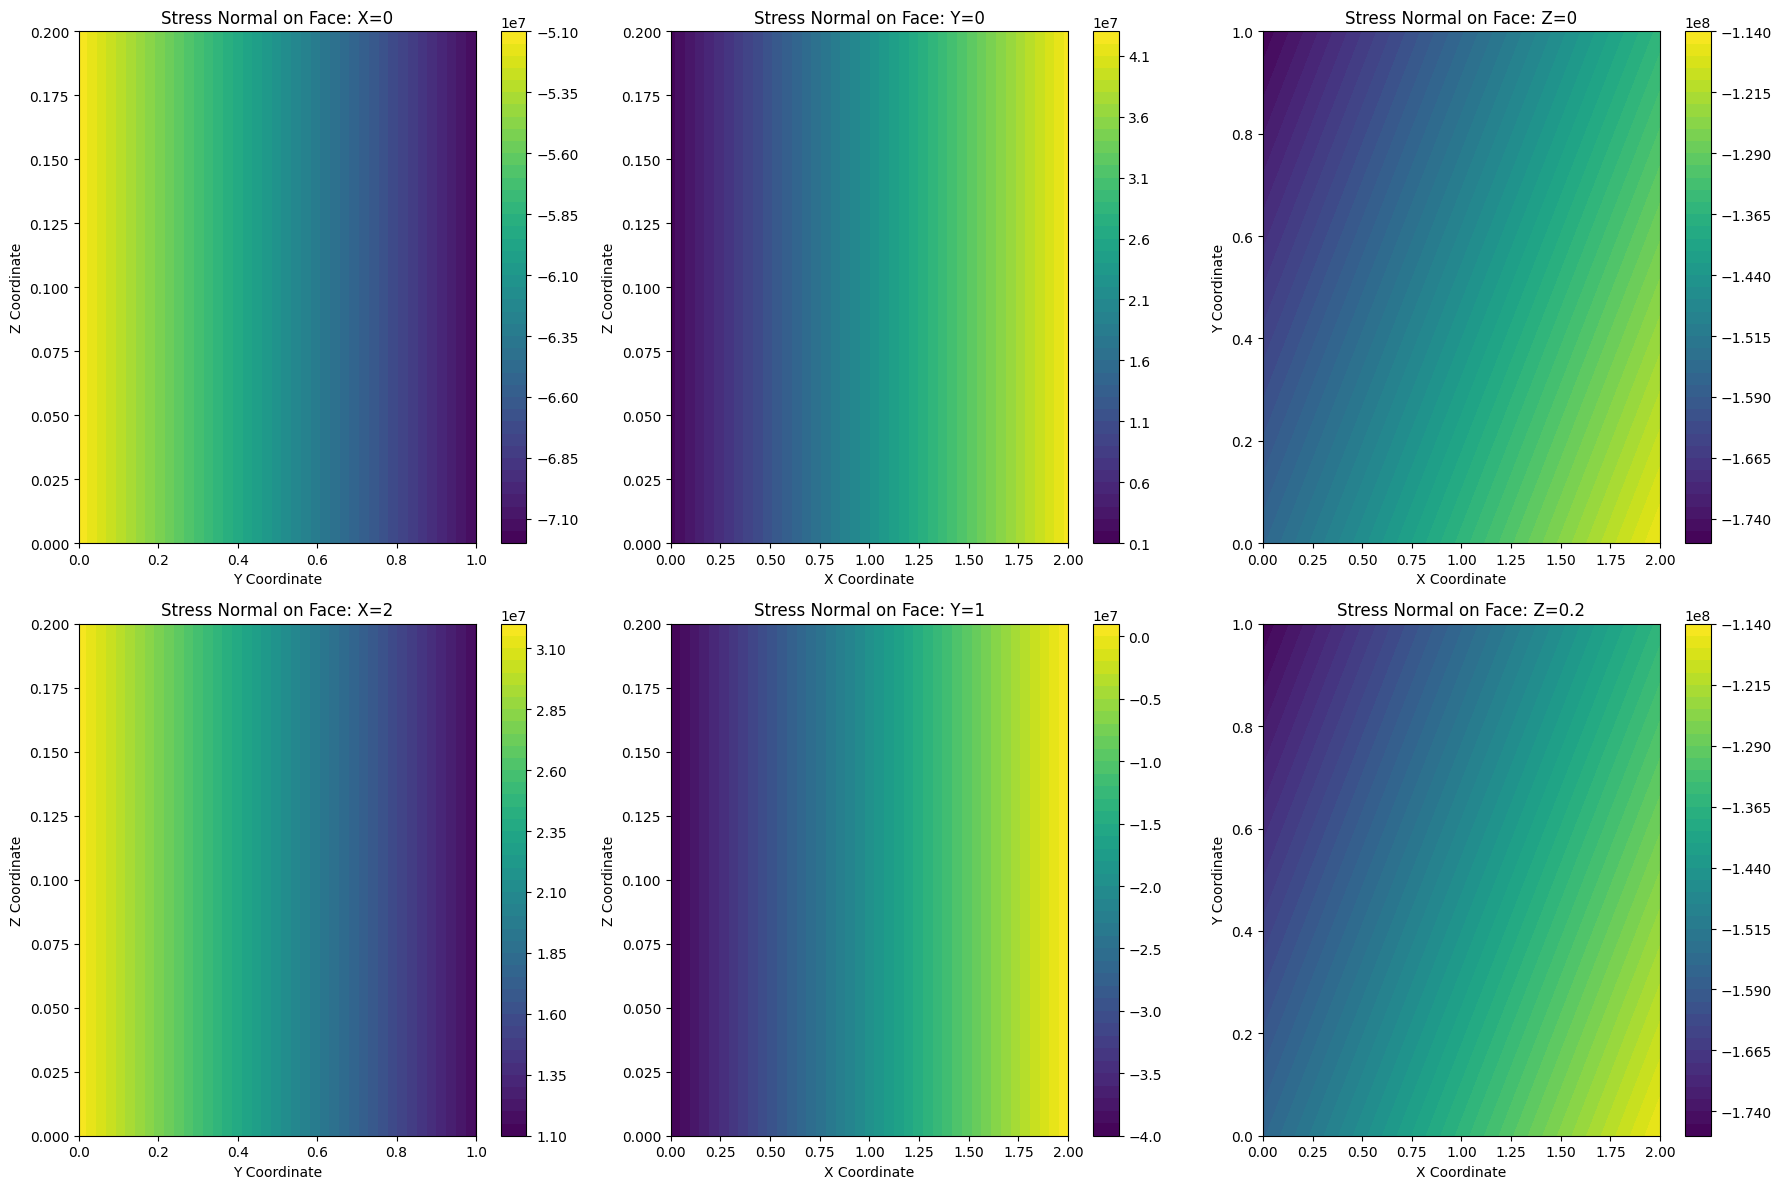

In [129]:

# Función para calcular el esfuerzo normal y generar el mapa de calor
def stress_normal_subplot(sigma, n_vector, x_range, y_range, const_value, subplot_pos, fixed_var):
    n = sp.Matrix(n_vector)
    t_n = sigma * n
    sigma_n = t_n.dot(n)
    
    # Variables para el gráfico
    x_var, y_var = {X, Y, Z} - {fixed_var}
    x_var, y_var = sorted([x_var, y_var], key=str)
    
    # Convertir las expresiones simbólicas a funciones numéricas
    sigma_n_func = sp.lambdify((x_var, y_var), sigma_n.subs(fixed_var, const_value))
    
    # Crear un grid de valores para las variables libres
    x_vals = np.linspace(*x_range, 20)
    y_vals = np.linspace(*y_range, 20)
    X_vals, Y_vals = np.meshgrid(x_vals, y_vals)
    
    # Evaluar la función en el grid
    Sigma_n_vals = sigma_n_func(X_vals, Y_vals)
    
    # Crear un gráfico de contorno
    ax = plt.subplot(2, 3, subplot_pos)
    contour = ax.contourf(X_vals, Y_vals, Sigma_n_vals, levels=50, cmap='viridis')
    plt.colorbar(contour, ax=ax)
    ax.set_title(f"Stress Normal on Face: {fixed_var}={const_value}")
    ax.set_xlabel(f"{x_var} Coordinate")
    ax.set_ylabel(f"{y_var} Coordinate")

# Crear una figura grande para todos los subplots
plt.figure(figsize=(18, 12))

# Caras con X constante
stress_normal_subplot(stress_tensor, [-1, 0, 0], (0, 1), (0, 0.2), 0, 1, X)   # X = 0
stress_normal_subplot(stress_tensor, [1, 0, 0], (0, 1), (0, 0.2), 2, 4, X)    # X = 2

# Caras con Y constante
stress_normal_subplot(stress_tensor, [0, -1, 0], (0, 2), (0, 0.2), 0, 2, Y)   # Y = 0
stress_normal_subplot(stress_tensor, [0, 1, 0], (0, 2), (0, 0.2), 1, 5, Y)    # Y = 1

# Caras con Z constante
stress_normal_subplot(stress_tensor, [0, 0, -1], (0, 2), (0, 1), 0, 3, Z)     # Z = 0
stress_normal_subplot(stress_tensor, [0, 0, 1], (0, 2), (0, 1), 0.2, 6, Z)    # Z = 0.2

plt.tight_layout()
plt.show()


Ahora para el vector de esfuerzo de cizalladura

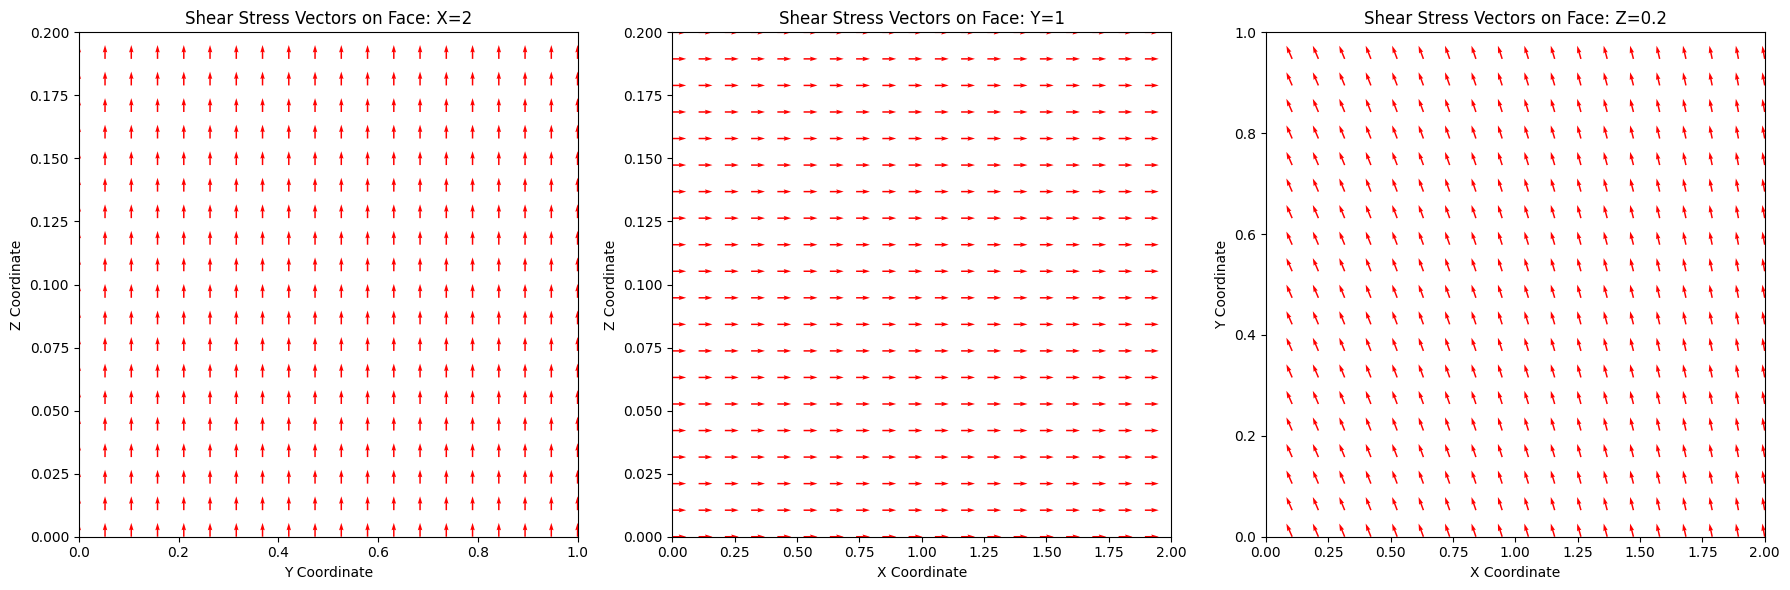

In [132]:
# Función para calcular el vector de esfuerzo de cizalladura y generar un mapa de campo vectorial
def shear_stress_vector_field(sigma, n_vector, x_range, y_range, const_value, subplot_pos, fixed_var):
    
    n = sp.Matrix(n_vector)
    t_n = sigma * n
    sigma_n = t_n.dot(n)
    tau_n = t_n - sigma_n * n
    
    # Variables para el gráfico
    x_var, y_var = {X, Y, Z} - {fixed_var} # Eliminar la variable fija
    x_var, y_var = sorted([x_var, y_var], key=str)
    
    # Convertir las expresiones simbólicas a funciones numéricas
    tau_n_func_x = sp.lambdify((x_var, y_var), tau_n[0].subs(fixed_var, const_value))
    tau_n_func_y = sp.lambdify((x_var, y_var), tau_n[1].subs(fixed_var, const_value))
    tau_n_func_z = sp.lambdify((x_var, y_var), tau_n[2].subs(fixed_var, const_value))
    
    # Crear un grid de valores para las variables libres
    x_vals = np.linspace(*x_range, 20)
    y_vals = np.linspace(*y_range, 20)
    X_vals, Y_vals = np.meshgrid(x_vals, y_vals)
    
    # Evaluar las funciones en el grid
    Tau_n_vals_x = tau_n_func_x(X_vals, Y_vals)
    Tau_n_vals_y = tau_n_func_y(X_vals, Y_vals)
    # Tau_n_vals_z = tau_n_func_z(X_vals, Y_vals)
    
    # Crear un mapa de campo vectorial
    ax = plt.subplot(1, 3, subplot_pos)
    ax.quiver(X_vals, Y_vals, Tau_n_vals_x, Tau_n_vals_y, color='r')
    ax.set_title(f"Shear Stress Vectors on Face: {fixed_var}={const_value}")
    ax.set_xlabel(f"{x_var} Coordinate")
    ax.set_ylabel(f"{y_var} Coordinate")
    ax.set_xlim(x_range)
    ax.set_ylim(y_range)

# Crear una figura grande para todos los subplots
plt.figure(figsize=(18, 6))

# Elegir tres caras: X=2, Y=1, Z=0.2
shear_stress_vector_field(stress_tensor, [1, 0, 0], (0, 1), (0, 0.2), 2, 1, X)   # X = 2
shear_stress_vector_field(stress_tensor, [0, 1, 0], (0, 2), (0, 0.2), 1, 2, Y)   # Y = 1
shear_stress_vector_field(stress_tensor, [0, 0, 1], (0, 2), (0, 1), 0.2, 3, Z)   # Z = 0.2

plt.tight_layout()
plt.show()